Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Some libraries to solve PDE
In this notebook we will learn how to use some external libraries to efficiently and easily solve PDE of several types.

# Py-pde
https://py-pde.readthedocs.io/en/latest/

To install it, run

In [ ]:
!pip install h5py pandas pyfftw tqdm #usefull deps
!pip install py-pde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 339 kB 5.2 MB/s 


Or, if you use conda, use (this will install all deps)

In [ ]:
!conda install -c conda-forge py-pde

/bin/bash: conda: command not found


## Example: Laplace equation
https://py-pde.readthedocs.io/en/latest/examples_gallery/laplace_eq_2d.html#sphx-glr-examples-gallery-laplace-eq-2d-py

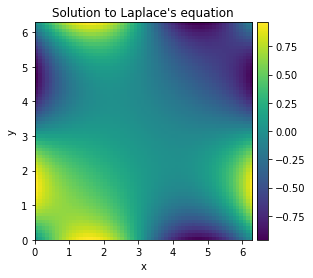

In [ ]:
import numpy as np

from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]

res = solve_laplace_equation(grid, bcs)
res.plot()

Checking info and possibilities:
- https://py-pde.readthedocs.io/en/latest/packages/pde.grids.cartesian.html#pde.grids.cartesian.CartesianGrid
- https://py-pde.readthedocs.io/en/latest/packages/pde.pdes.laplace.html#pde.pdes.laplace.solve_laplace_equation
- https://py-pde.readthedocs.io/en/latest/packages/pde.grids.boundaries.html#documentation-boundaries

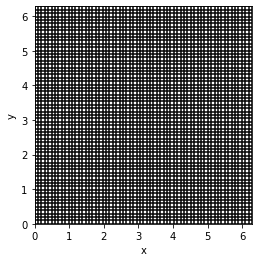

In [ ]:
grid.plot()

### Exercise: Same exercise as in class
After understanding the functionality, reproduce the exercise we solved in class 

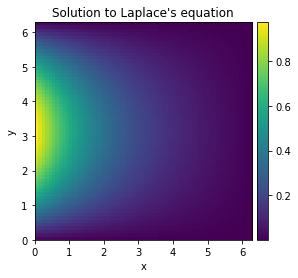

In [ ]:
import numpy as np

from pde import CartesianGrid, solve_laplace_equation

L = 2*np.pi
N = 64
grid = CartesianGrid([[0, L]] * 2, N)

bcs = [[{"value": f"sin(y*{np.pi/L})"},{"value": "0"}]# en x
       ,{"value": "0"}] # en y

res = solve_laplace_equation(grid, bcs)
res.plot()

**Questions**
- Is the time the same as in your original implementation?
- Is it possible to write the solution to a file? Look for in the documentation. 

Now create an animation. Check the examples and: https://py-pde.readthedocs.io/en/latest/packages/pde.visualization.movies.html

## Example: Diffusion equation
https://py-pde.readthedocs.io/en/latest/examples_gallery/simple.html#sphx-glr-examples-gallery-simple-py

  0%|          | 0/100.0 [00:00<?, ?it/s]

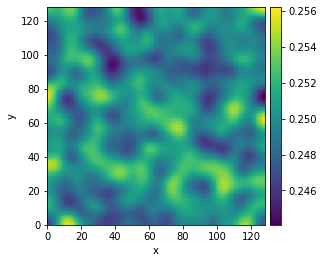

In [ ]:
from pde import DiffusionPDE, ScalarField, UnitGrid

N = 128 
grid = UnitGrid([N,N])  # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

eq = DiffusionPDE(diffusivity=0.1)  # define the pde
result = eq.solve(state, t_range=100)
result.plot()

## Example: Spherically symmetric
https://py-pde.readthedocs.io/en/latest/examples_gallery/spherical_grid.html#sphx-glr-examples-gallery-spherical-grid-py

  0%|          | 0/0.1 [00:00<?, ?it/s]

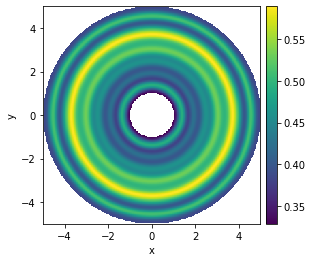

In [ ]:
from pde import DiffusionPDE, ScalarField, SphericalSymGrid

grid = SphericalSymGrid(radius=[1, 5], shape=128)  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition

eq = DiffusionPDE(0.1)  # define the PDE
result = eq.solve(state, t_range=0.1, dt=0.001)

result.plot(kind="image")

## Example: movie
https://github.com/zwicker-group/py-pde/tree/master/examples

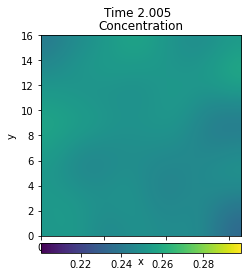

In [ ]:
"""
Create a movie from a storage
=============================

This example shows how to create a movie from data stored during a simulation. Making
movies requires that `ffmpeg` is installed in a standard location.
"""

from pde import DiffusionPDE, MemoryStorage, ScalarField, UnitGrid, movie_scalar

grid = UnitGrid([16, 16])  # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3)  # generate initial condition

storage = MemoryStorage()  # create storage
tracker = storage.tracker(interval=0.010)  # create associated tracker
storage.tracker?

eq = DiffusionPDE()  # define the physics
eq.solve(state, t_range=2, dt=0.005, tracker=tracker)

# create movie from stored data
movie_scalar(storage, "diffusion.mov")


# Writing and reading data
https://py-pde.readthedocs.io/en/latest/examples_gallery/trajectory_io.html#sphx-glr-examples-gallery-trajectory-io-py


/tmp/tmp_xoldm0g.hdf5


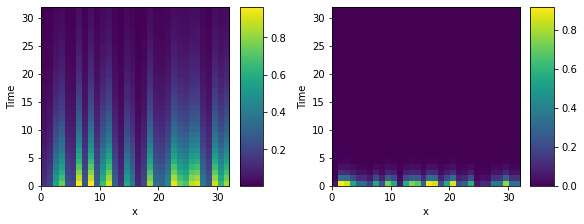

In [ ]:
from tempfile import NamedTemporaryFile

import pde

# define grid, state and pde
grid = pde.UnitGrid([32])
state = pde.FieldCollection(
    [pde.ScalarField.random_uniform(grid), pde.VectorField.random_uniform(grid)]
)
eq = pde.PDE({"s": "-0.1 * s", "v": "-v"})

# get a temporary file to write data to
path = NamedTemporaryFile(suffix=".hdf5")
print(path.name)

# run a simulation and write the results
writer = pde.FileStorage(path.name, write_mode="truncate")
eq.solve(state, t_range=32, dt=0.01, tracker=writer.tracker(1))

# read the simulation back in again
reader = pde.FileStorage(path.name, write_mode="read_only")
pde.plot_kymographs(reader)

# Scikit finite diff
https://scikit-fdiff.readthedocs.io/en/latest/

Install:

In [ ]:
!pip install scikit-fdiff
#!pip install scikit-fdiff[interactive,numba]

Also install holoviews for a nice visualization

In [ ]:
#!conda install -c pyviz holoviews bokeh
!pip install holoviews bokeh

In [ ]:
from skfdiff import Model, Simulation
import pylab as pl
import numpy as np
from scipy.signal.windows import gaussian

model = Model(["-(dx((H + h) * u) + dy((H + h) * v))",
               "-(u * dxu + v * dyu) - g * dxh + nu * (dxxu + dyyu)",
               "-(u * dxv + v * dyv) - g * dyh + nu * (dxxv + dyyv)"],
               ["h(x, y)", "u(x, y)", "v(x, y)"],
               parameters=["H(x, y)", "nu", "g"],
               boundary_conditions="periodic")

L = 10
x = y = np.linspace(-L / 2, L / 2, 56)
xx, yy = np.meshgrid(x, y, indexing="ij")
h = (gaussian(x.size, x.size // 20)[:, None] *
     gaussian(y.size, y.size // 20)[None, :]) + 1
h = np.roll(h, 12, axis=0)
h = np.roll(h, 12, axis=1)
H = np.zeros_like(h)
u = np.zeros_like(h)
v = np.zeros_like(h)
initial_fields = model.Fields(x=x, y=y, h=h, u=u, v=v,
                              H=H, g=9.81, nu=0)

simulation = Simulation(model, initial_fields, dt=.1, tmax=1)
container = simulation.attach_container()
tmax, final_fields = simulation.run()

In [ ]:
import holoviews as hv
hv.notebook_extension("bokeh")
hv.Dataset(container.data.h).to(hv.Image, ["x", "y"])

# Simpy pde solve
https://docs.sympy.org/latest/modules/solvers/pde.html

# Some Finite element libs
- https://sfepy.org/doc-devel/index.html
- https://fenicsproject.org/